In [11]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm
from epi_analysis import df_make_separation

%matplotlib inline
matplotlib.rc("figure", dpi=150)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [12]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/21x21/2022-12-05_pgun_SciGlass_2x2x40_e-_wall_only_e0.7-3GeV_center_1prt_20000evt.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p)
all_vals_df.head()

,p,prt_name,de_sum,towers,e_div_p
0,0.7,e-,0.675108,"[0, 0]",0.964440
1,0.7,e-,0.682598,"[0, 0]",0.975141
2,0.7,e-,0.665558,"[0, 0]",0.950797
3,0.7,e-,0.680401,"[0, 0]",0.972001
4,0.7,e-,0.671705,"[0, 0]",0.959579


In [13]:
de_sum_007 = all_vals_df.query("0.6 < p <= 0.8").de_sum
all_vals_df.groupby("p").mean()

,de_sum,e_div_p
p,,
0.7,0.480406,0.686295
1.0,0.669639,0.669639
2.0,1.258134,0.629067
3.0,1.828754,0.609585


In [ ]:
results = []

In [10]:
energy = 0.4
row = []
results.append(df_make_separation(all_vals_df, 0.7, 0.1))

NameError: name 'results' is not defined

0.2899197726571756 6.696259420966101 0.9659425610197996 0.004392772059503305
0.9501702520921826 0.028471575712841785
0.8805278338812742 0.00545 0.0219 0.9781 20000


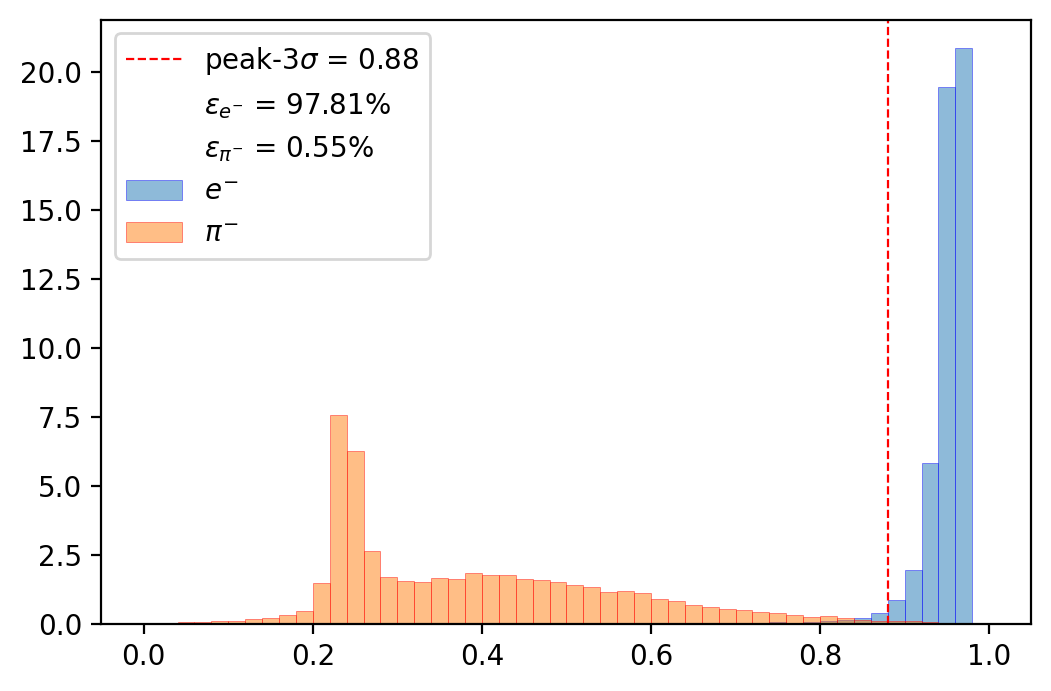

In [ ]:
df_make_separation(all_vals_df, 1, 0.1)

0.39507505623283856 6.686485798534029 0.9583960826027977 0.006286182917279537
0.9438220965623856 0.028433964608396516
0.8730941887776082 0.00135 0.02425 0.97575 20000


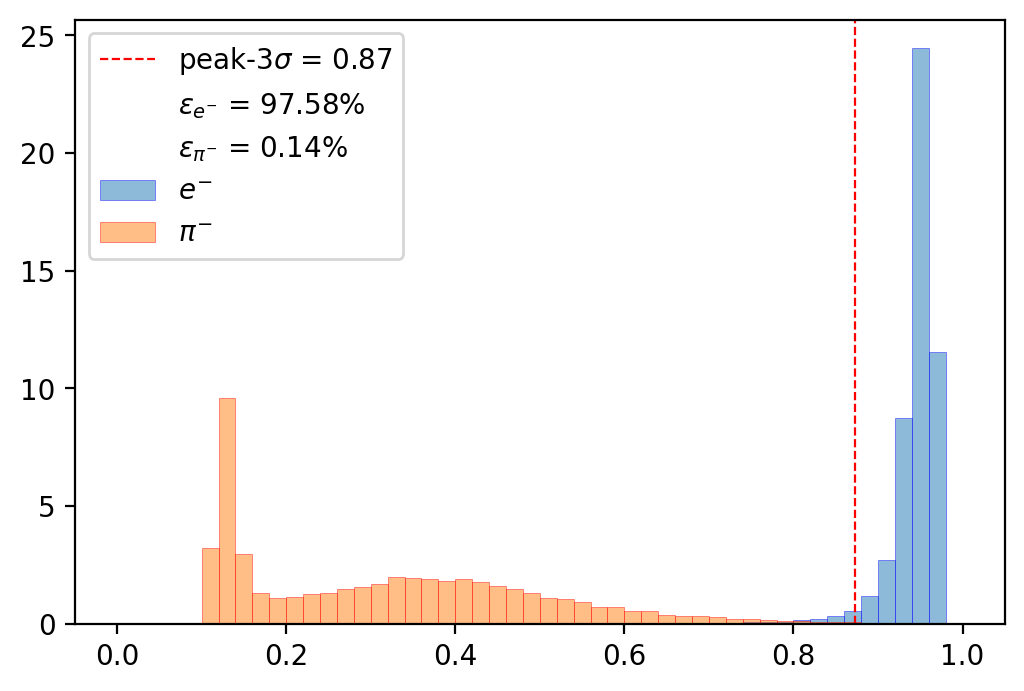

In [ ]:
df_make_separation(all_vals_df, 2, 0.1)

0.4476529803490048 6.196351682697507 0.9533556379033199 0.007170671770586076
0.9390444865822792 0.0293382628446216
0.8653408493694551 0.00175 0.02365 0.97635 20000


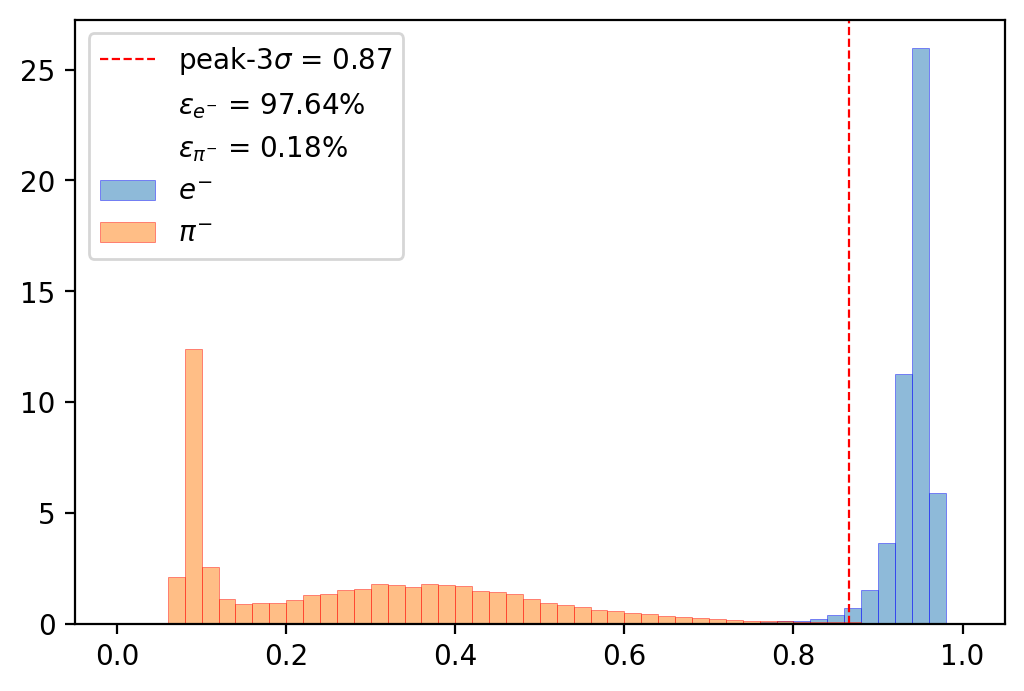

In [ ]:
df_make_separation(all_vals_df, 3, 0.1)

0.4242860579217522 6.955145543930704 0.9325906305143125 0.008913915958563584
0.9144446737015247 0.03519977161118542
0.8269913156807562 0.00685 0.0258 0.9742 20000


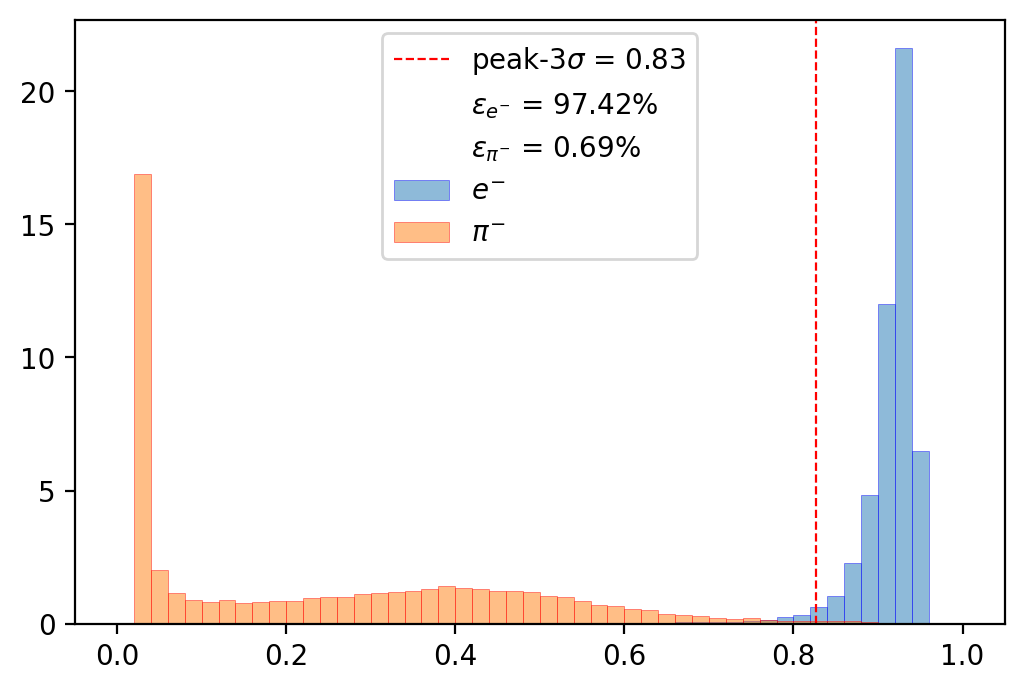

In [ ]:
df_make_separation(all_vals_df, 10, 0.1)